# 2D MRI tests

In [153]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
#%matplotlib inline
%pylab inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
#import pylab
import athena_read as ath
from astropy.io import ascii
import shwave
import athena_read  as ath
from shwave import cn4, cn5

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## 1. images of the non-linear evolution of MRI in x-z

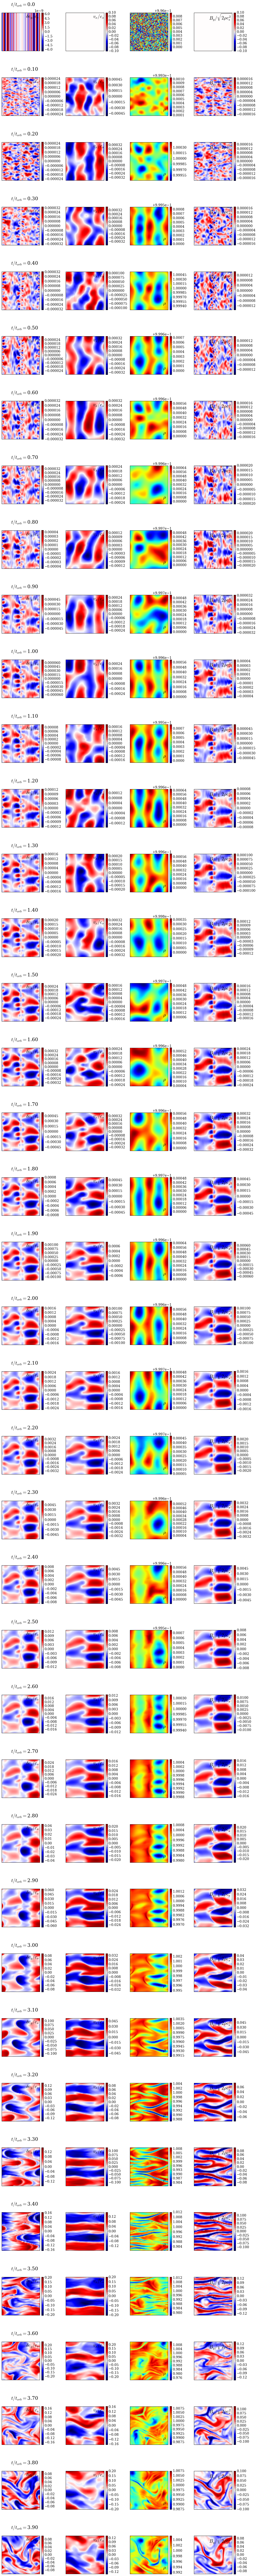

In [3]:
import athena_map as amap

q=1.5; omg=1e-3; torb=np.pi*2./omg; cs=0.00408
targ = '../develop/bin/mri/r64'
ts=0; te=40
nplot = te - ts + 1
ngrid = 4
cnt = 1
pylab.rcParams['figure.figsize'] = (15, 15.0*nplot/ngrid)
probid='HB3'
for i in np.arange(ts,te,1):
  filename=targ+'/'+probid+'.block0.out2.'+cn5(i)+'.vtk'
  trunk = ath.vtk(filename)
  t = amap.map(trunk,'time',shcoord='xz')
  grid = amap.map(trunk,'grid',shcoord='xz')
  #print grid
  x = amap.rmghost(grid[0]) 
  y = amap.rmghost(grid[1])
  z = amap.rmghost(grid[2])
  xb = x[:-1]+(x[1]-x[0])*0.5
  zb = z[:-1]+(z[1]-z[0])*0.5
  #print xb
  bcc = amap.map(trunk,'magnetic',shcoord='xz')
  bx = amap.rmghost(bcc[:,:,:,0])[0]
  by = amap.rmghost(bcc[:,:,:,2])[0]
  bz = amap.rmghost(bcc[:,:,:,1])[0]
  vel = amap.map(trunk,'velocity',shcoord='xz')
  velx = amap.rmghost(vel[:,:,:,0])[0]/cs
  vely = amap.rmghost(vel[:,:,:,2])[0]
  velz = amap.rmghost(vel[:,:,:,1])[0]/cs
  rho = amap.map(trunk,'density',shcoord='xz')
  rho = amap.rmghost(rho[:,:,:])[0]
  #print np.size(xb), np.shape(rho)
  dvely = vely + np.resize(q*omg*xb,[np.size(xb),np.size(zb)])
  dvely /=cs
  
  for j in np.arange(4):
    if j == 0: 
      data=dvely
      x1=40;y1=55;lab1=r'$\delta v_y/c_s$'
      x2=15;y2=75;lab2=r'$t/t_{orb}=$'+str(t/torb)[0:4]
      fontsize=20;origin='lower';fraction=0.046;pad=0.04
    if j == 1:
      data=velx
      x1=45;y1=55;lab1=r'$v_x/c_s$'
    if j == 2:
      data=rho
      x1=55;y1=8;lab1=r'$\rho$'
    if j == 3:
      data=by/(np.sqrt(2)*cs)
      x1=25;y1=52;lab1=r'$B_y/\sqrt{2\rho c_s^2}$'
    
    plt.subplot(nplot,ngrid,cnt)
    bbmax=np.max([np.abs(np.min(data)), np.max(data)])
    if lab1==r'$\rho$':
      plt.imshow(data,origin=origin)
    else:
      plt.imshow(data,cmap=plt.get_cmap('seismic'),clim=[-bbmax,bbmax],origin=origin)
    
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(fraction=fraction, pad=pad) 
    plt.text(x1,y1,lab1,fontsize=fontsize)
    if j == 0: plt.text(x2,y2,lab2,fontsize=fontsize)
    cnt +=1 
    
plt.tight_layout()
plt.show()
    

## 2. Movie of $\delta v_y / c_s $


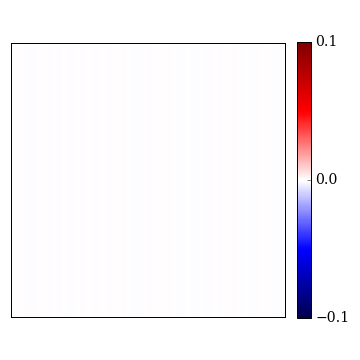
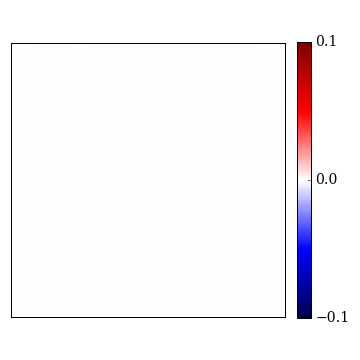
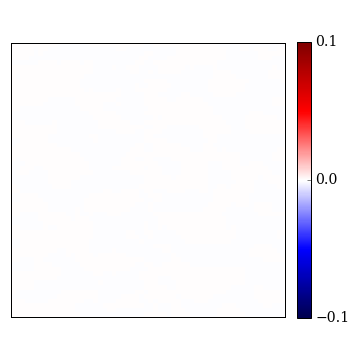
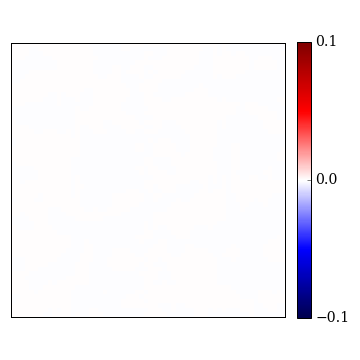
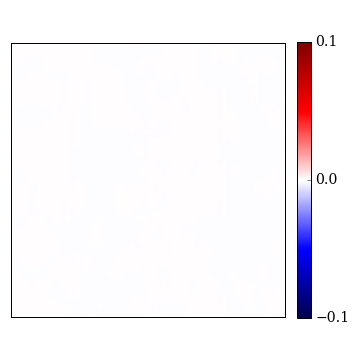
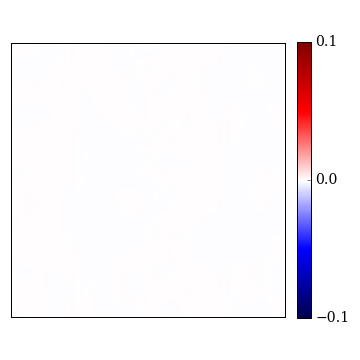
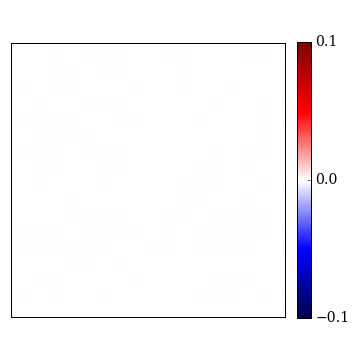
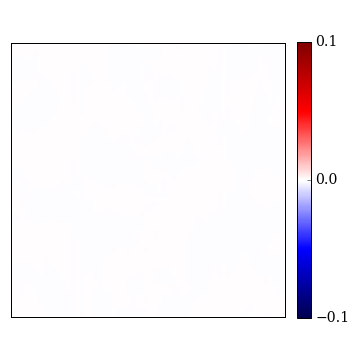
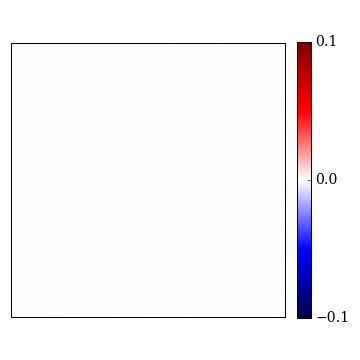
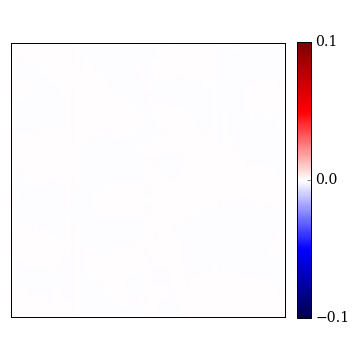
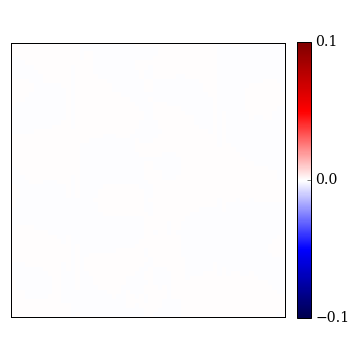
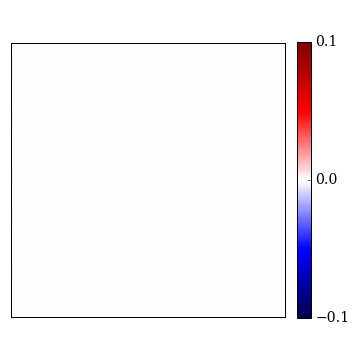
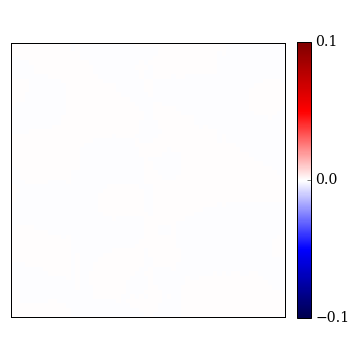
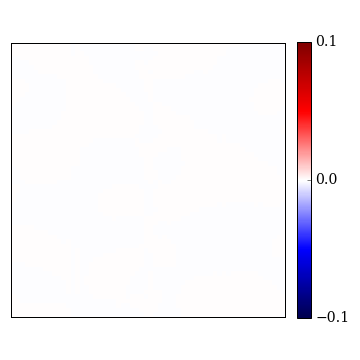
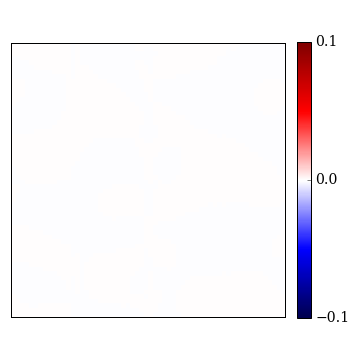
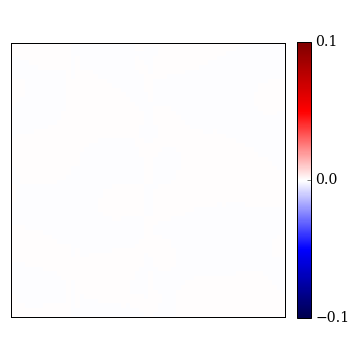
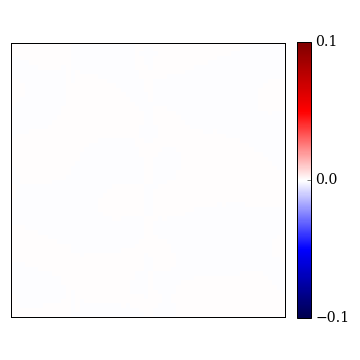
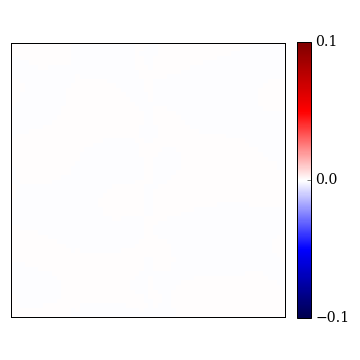
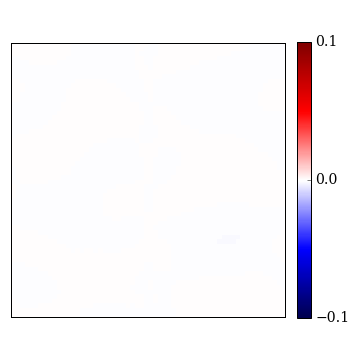
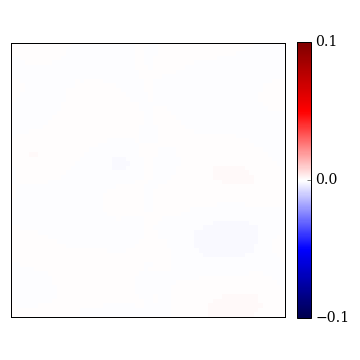
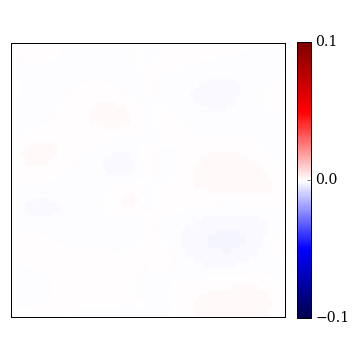
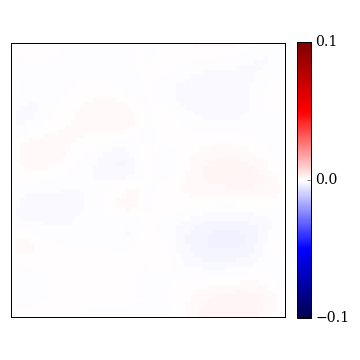
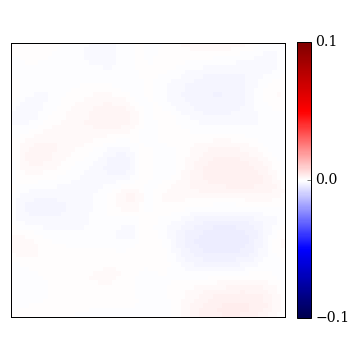
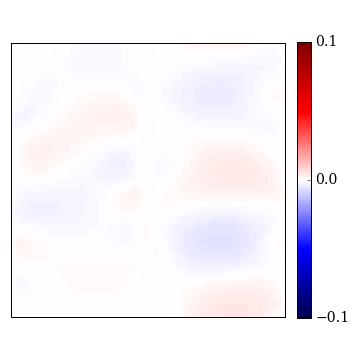
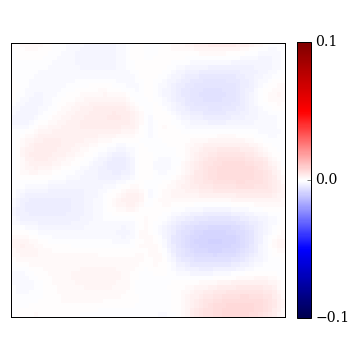
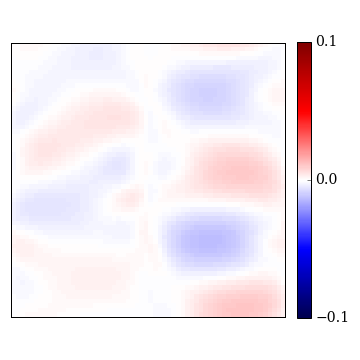
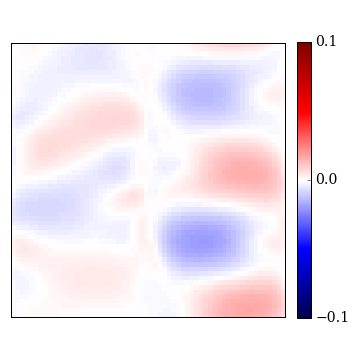
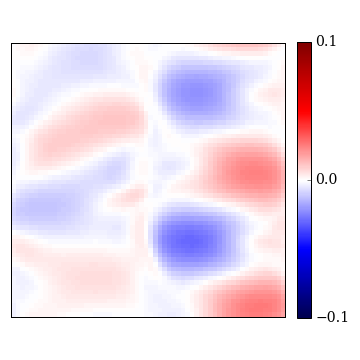
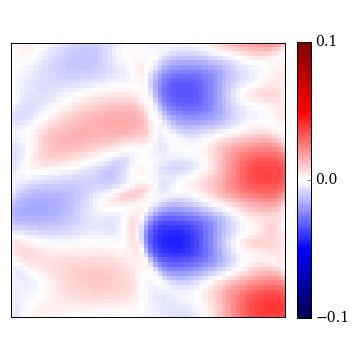
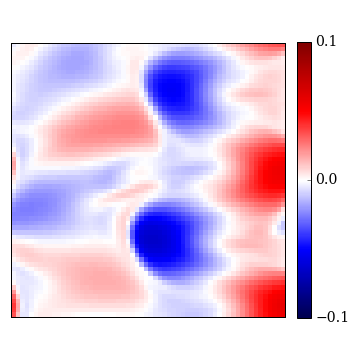
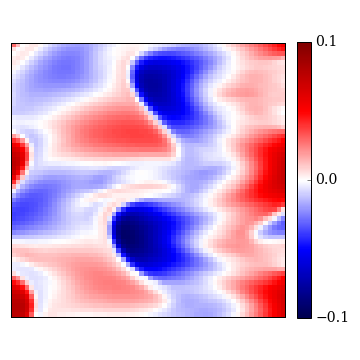
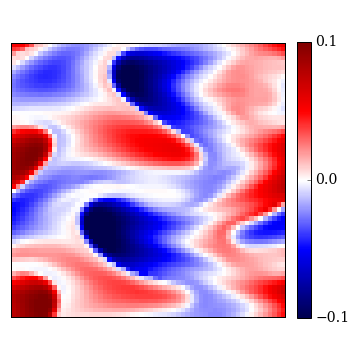
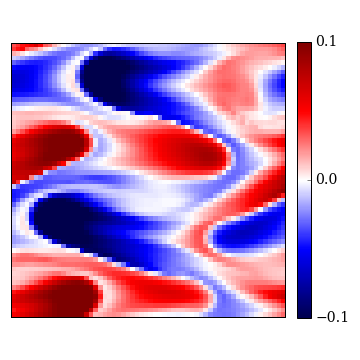
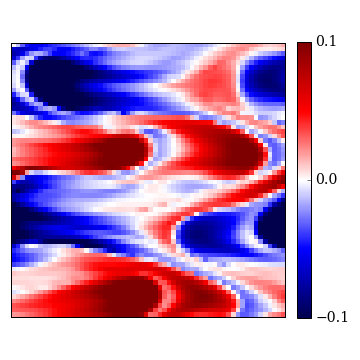
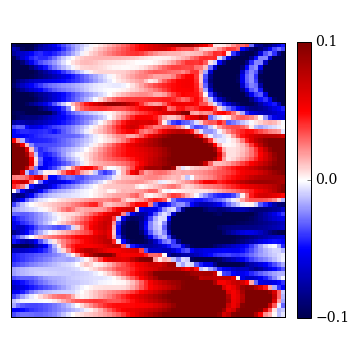
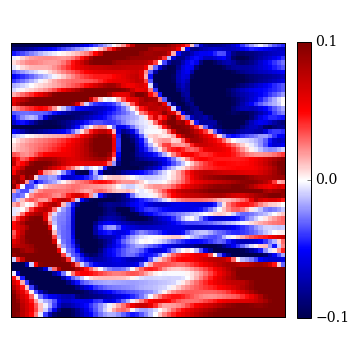
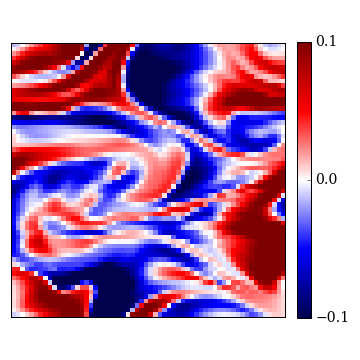
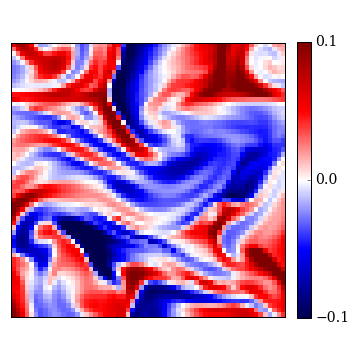
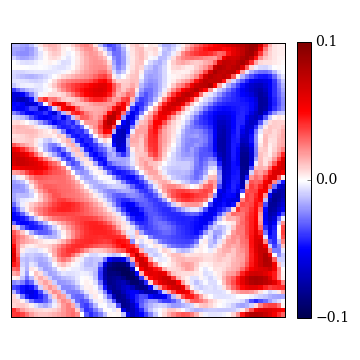
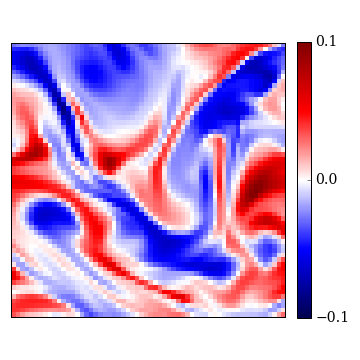
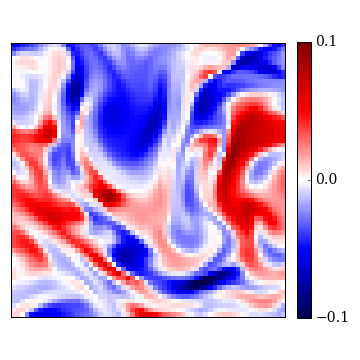
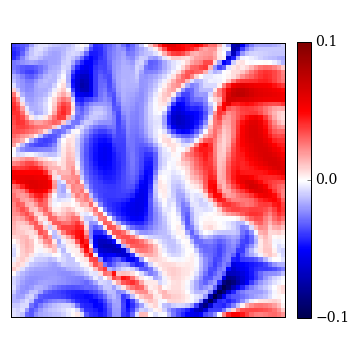
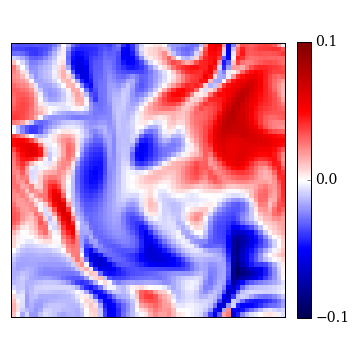
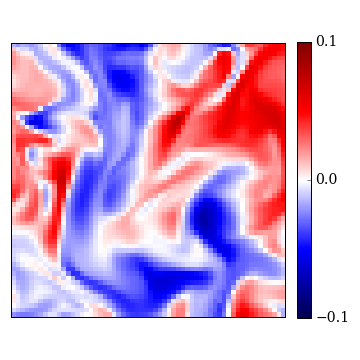
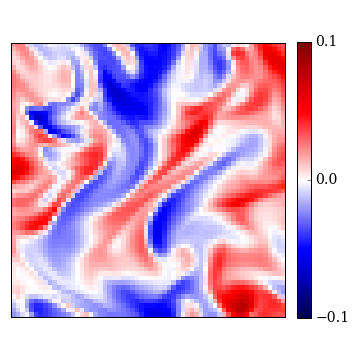
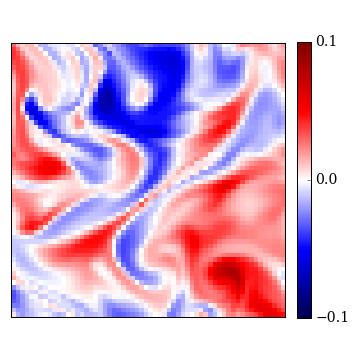
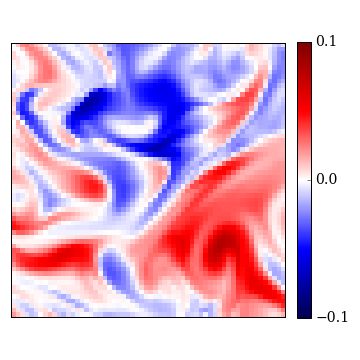
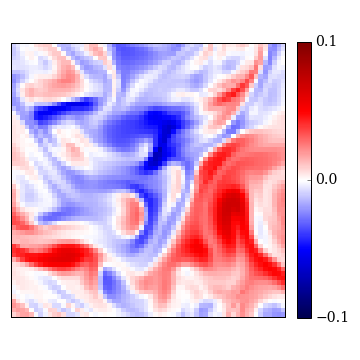
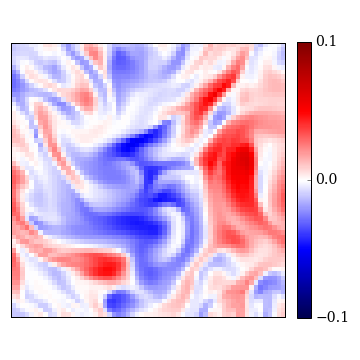
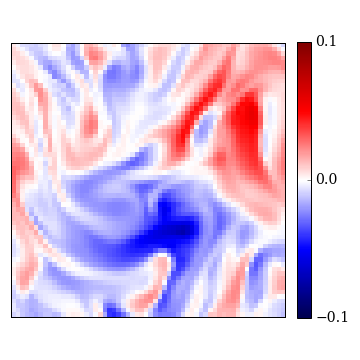
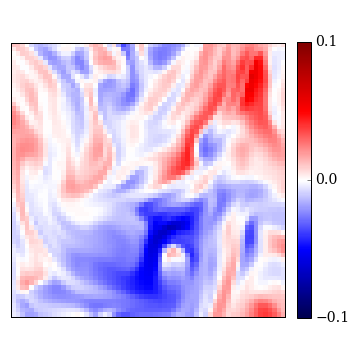
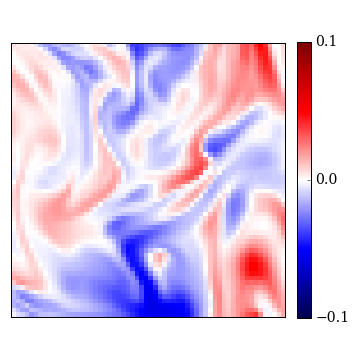
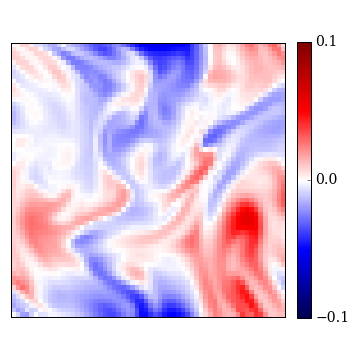
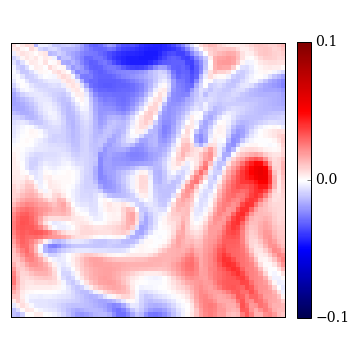
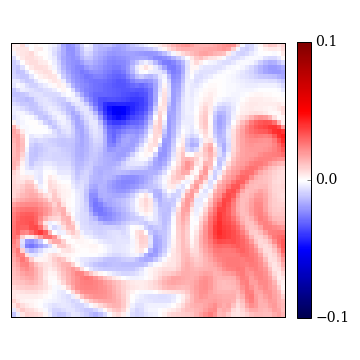
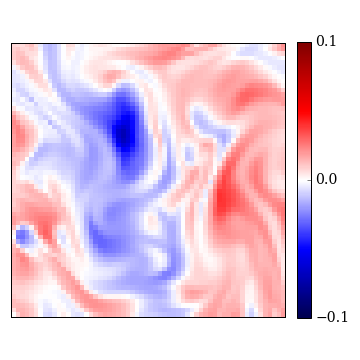
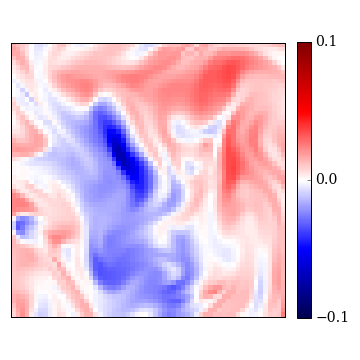
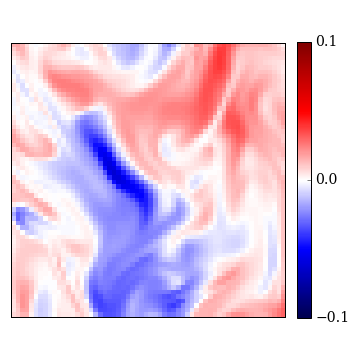
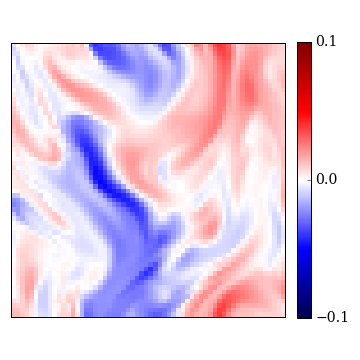
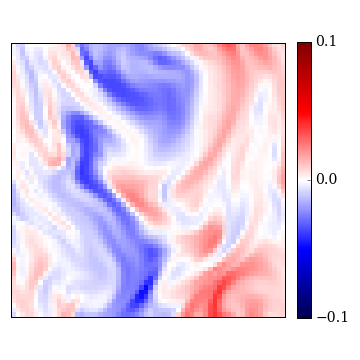
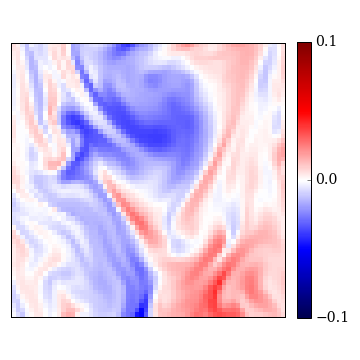
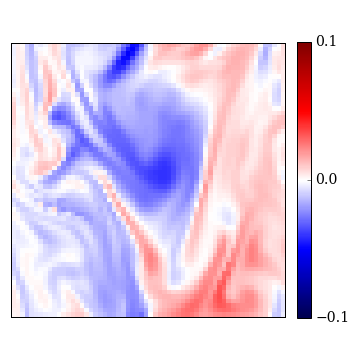
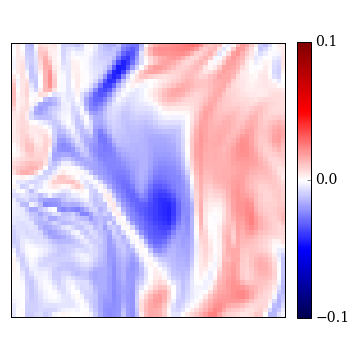
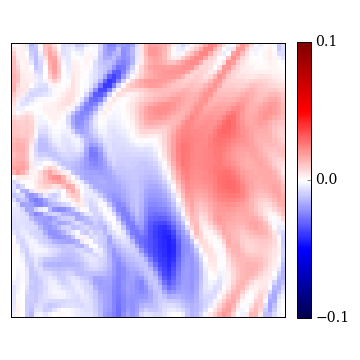
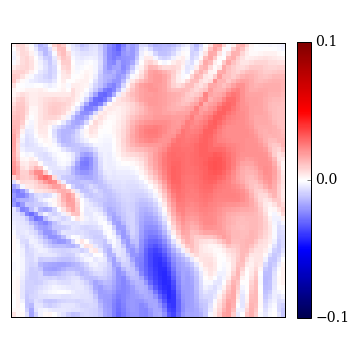
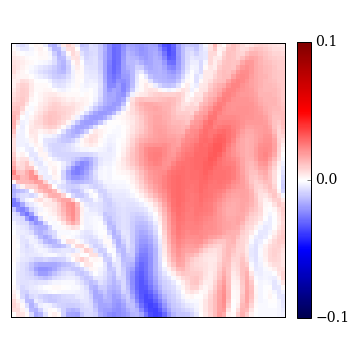
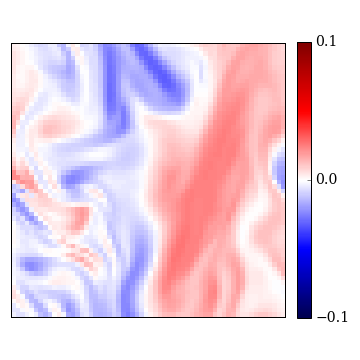
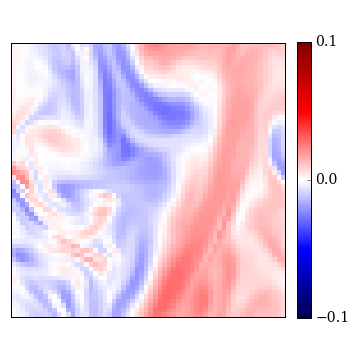
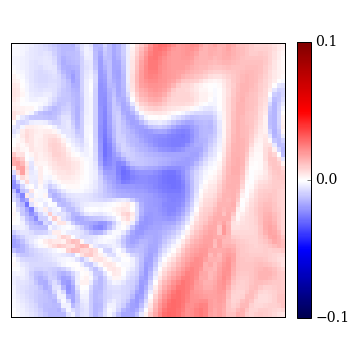
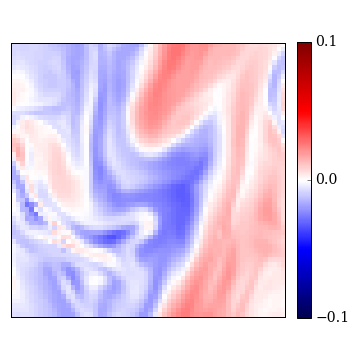
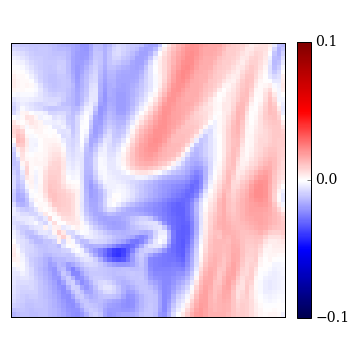
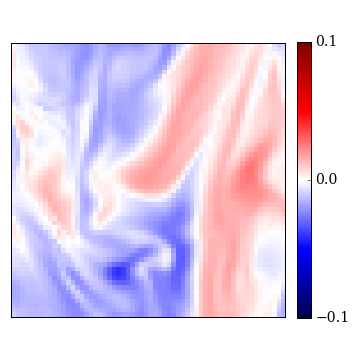
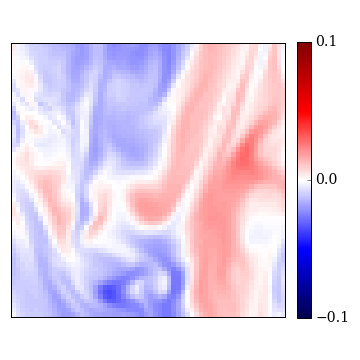
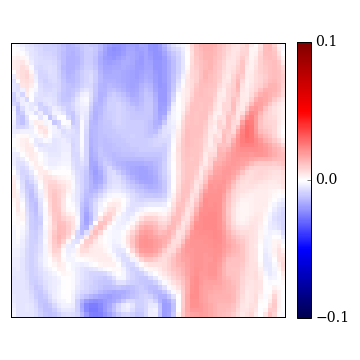
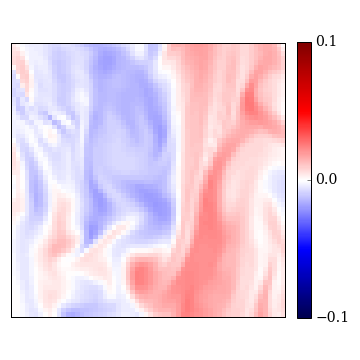
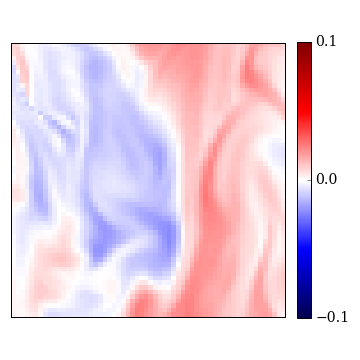
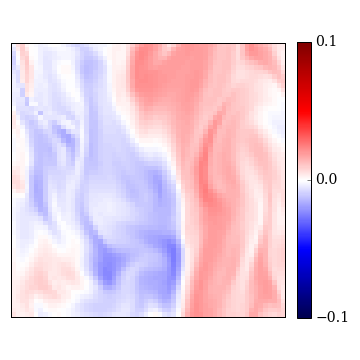
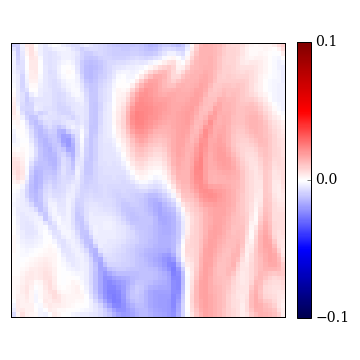
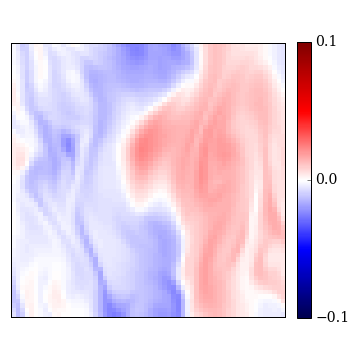
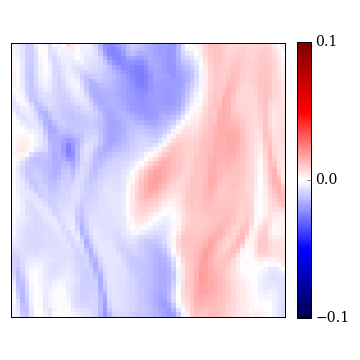

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pylab
from matplotlib import animation
from JSAnimation import IPython_display
import athena_read as ath
import athena_map as amap
from shwave import cn5

dpi = 100
time = 0.0 # global variable for time (in orbits)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

im = ax.imshow(np.zeros([256,256]),cmap='seismic',interpolation='nearest',origin='lower')
im.set_clim([-0.1,0.1])
cbar = fig.colorbar(im, ticks=[-0.1, 0, 0.1],fraction=0.046,pad=0.04)
#title = plt.title(r'$t/t_{orb}=$'+str(time)[0:4],fontsize=20)
#ax.colorbar(fraction=0.046,pad=0.04)
fig.set_size_inches([5,5])


tight_layout()
  
def init():
    tmp = np.zeros([300,300])
    im.set_data(tmp)
    return im
def animate(i):
# read frames i
  def read_athena(i):
    q=1.5; omg=1e-3; torb=np.pi*2./omg; cs=0.00408;probid='HB3'
    targ = '../athena/bin'
    filename=targ+'/'+probid+'.block0.out2.'+cn5(i)+'.vtk'
    trunk = ath.vtk(filename)
    t = amap.map(trunk,'time',shcoord='xz')/torb
    grid = amap.map(trunk,'grid',shcoord='xz')
    #print grid
    x = amap.rmghost(grid[0]) 
    xb = x[:-1]+(x[1]-x[0])*0.5
    z = amap.rmghost(grid[2]) 
    zb = z[:-1]+(x[1]-x[0])*0.5
    vel = amap.map(trunk,'velocity',shcoord='xz')
    vely = amap.rmghost(vel[:,:,:,2])[0]
    dvely = vely + np.resize(q*omg*xb,[np.size(xb),np.size(zb)])
    dvely /=cs
    return dvely
# set frame i
  dvely = read_athena(i)
  im.set_data(dvely)
  return im

    #legend(loc=0)

animation.FuncAnimation(fig,animate,init_func=init,interval=30,frames=80)

 ## 3. $B_x^2$ vs. time
 idl> mri2d,'~/reconnect/athena4.0/2d-mri/r64/data/',0,80
 idl> mri2d,'~/reconnect/athena4.0/2d-mri/r128/data/',0,80
 idl> mri2d,'~/reconnect/athena4.0/2d-mri/r256/data/',0,80
 use the followings to derive the Bx^2 for athena++ data (Q: r256 data seems not being save automatically...)

In [2]:
import athena_map as amap
import csv
from os import path
from os import remove
 
q=1.5; omg=1e-3; torb= 2.*np.pi/omg; beta=4000.
cs=0.00408; d0=1.; p0=d0*cs**2; b0=np.sqrt(2.*p0/beta)
probid = 'HB3'

#for nres in [0,1]:
#  if nres == 0: fname='r64'
#  if nres == 1: fname='r128'
#  if nres == 2: fname='r256'
#  targ = '../develop/bin/mri/'+fname  
for nres in [0]:
  targ = '../develop_bvals/bin/mri2d/'  
  print targ
  for i in np.arange(81):  
    filename=targ+'/'+probid+'.block0.out2.'+cn5(i)+'.vtk'
    trunk = ath.vtk(filename)
    time = amap.map(trunk,'time',shcoord='xz')/torb
    bcc = amap.map(trunk,'magnetic',shcoord='xz')
#    bx = amap.rmghost(bcc[:,:,:,0])[0]
    bx = amap.rmghost(bcc[:,:,:,0],ng=0)[0]
    bxavg2 = np.average(bx**2)/b0**2
    if i == 0: 
      fbx2 = targ+'/bx2.csv'
      if os.path.isfile(fbx2): 
        os.remove(fbx2)
        #print 'exist!!'+ fbx2
      f=open(fbx2, 'a')
      w=csv.writer(f,delimiter=' ')
      print type(f), type(w)
    #print  time, bxavg2    
    w.writerow([time,bxavg2])
  f.close

../develop_bvals/bin/mri2d/
<type 'file'> <type '_csv.writer'>


In [22]:
import athena_map as amap
import csv
from os import path
from os import remove
 
q=1.5; omg=1e-3; torb= 2.*np.pi/omg; beta=4000.
cs=0.00408; d0=1.; p0=d0*cs**2; b0=np.sqrt(2.*p0/beta)
probid = 'HB3'


targ = '../develop_bvals/bin/mri2d/'  
fbx2 = targ+'/bx2.csv'
#if os.path.isfile(fbx2):    os.remove(fbx2)
        #print 'exist!!'+ fbx2
try:
  f=open(fbx2, 'aw')
  w=csv.writer(f,delimiter=' ')
  print targ
  for i in np.arange(81):  
    filename=targ+'/'+probid+'.block0.out2.'+cn5(i)+'.vtk'
    trunk = ath.vtk(filename)
    time = amap.map(trunk,'time',shcoord='xz')/torb
    bcc = amap.map(trunk,'magnetic',shcoord='xz')
#    bx = amap.rmghost(bcc[:,:,:,0])[0]
    bx = (bcc[:,:,:,0])[0]
    bxavg2 = np.average(bx**2)/b0**2
#    print type(f), type(w)
    #print  time, bxavg2  
    w.writerow((time,bxavg2))
finally:
  f.close

../develop_bvals/bin/mri2d/


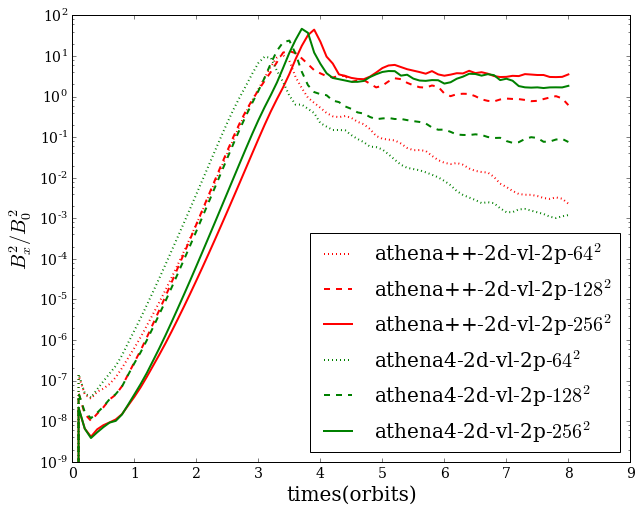

In [3]:

q=1.5; omg=1e-3; torb= 2.*np.pi/omg; beta=4000.
cs=0.00408; d0=1.; p0=d0*cs**2; b0=np.sqrt(2.*p0/beta)
t64,bx64 = np.loadtxt('../develop/bin/mri/r64/bx2.csv',unpack=True)
t128,bx128 = np.loadtxt('../develop/bin/mri/r128/bx2.csv',unpack=True)
t256,bx256 = np.loadtxt('../develop/bin/mri/r256/bx2.csv',unpack=True)

tt64,bbx64 = np.loadtxt('../athena4.0/2d-mri/r64/data/bx2.tab',unpack=True)
tt128,bbx128 = np.loadtxt('../athena4.0/2d-mri/r128/data/bx2.tab',unpack=True)
tt256,bbx256 = np.loadtxt('../athena4.0/2d-mri/r256/data/bx2.tab',unpack=True)


pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(t64,bx64,'r:',markersize=20,markevery=5) # athena++
plt.plot(t128,bx128,'r--',markersize=12,markevery=5) # athena++
plt.plot(t256,bx256,'r-',markersize=12,markevery=5) # athena++

plt.plot(tt64,bbx64,'g:',markersize=12,markevery=5)   # athena4 
plt.plot(tt128,bbx128,'g--',markersize=8,markevery=5)   # athena4
plt.plot(tt256,bbx256,'g-',markersize=8,markevery=5)   # athena4 

plt.yscale('log')
plt.ylim([1e-9,100])
plt.xlabel('times(orbits)',fontsize=20)
plt.ylabel(r'$B_x^2/B_0^2$',fontsize=20)

plt.legend(['athena++-2d-vl-2p-$64^2$','athena++-2d-vl-2p-$128^2$',\
            'athena++-2d-vl-2p-$256^2$',\
            'athena4-2d-vl-2p-$64^2$','athena4-2d-vl-2p-$128^2$', \
            'athena4-2d-vl-2p-$256^2$'],fontsize=20,loc='best')
plt.show()
